In [4]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns
#["Experiment_1_2024-10-09_17_20_37_666716", "Experiment_1_2024-10-09_19_23_14_435359"]
log_path = "..\\..\\logdata\\Experiment_1_2024-10-09_17_20_37_666716"
os.path.exists(log_path)

True

Create a target folder for saving the figures

In [5]:
targ_dir = os.path.join(log_path, "Analysis")
if not os.path.exists(targ_dir):
    os.mkdir(targ_dir)

Import dataset

In [6]:
test_df = pd.read_csv(os.path.join(log_path, "quantum_position_encoding_1.csv"), index_col=False)

Filter out the last iterations from the dataset

In [7]:
result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)

Plotting the performance graph for the two objectives

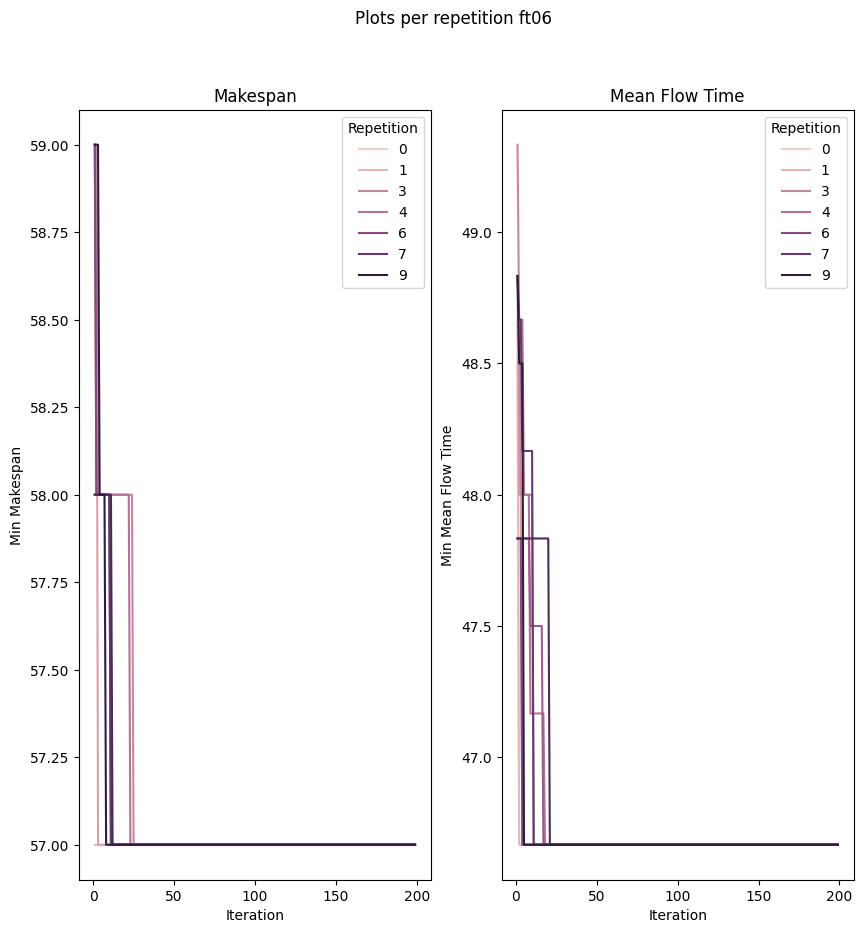

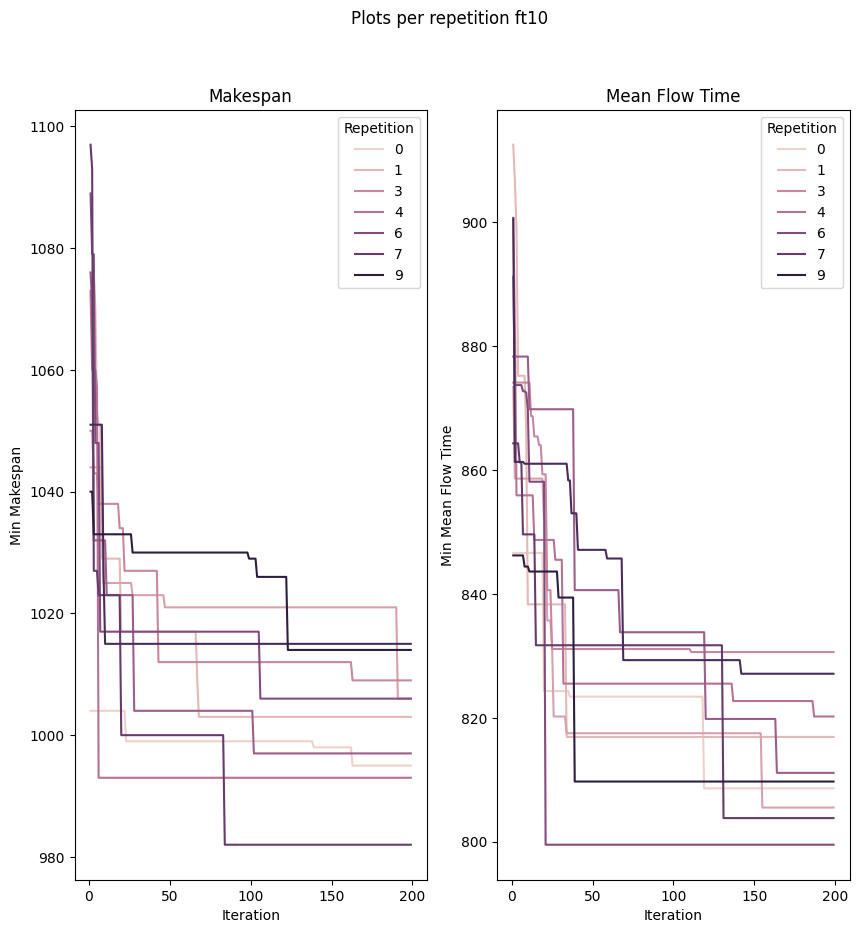

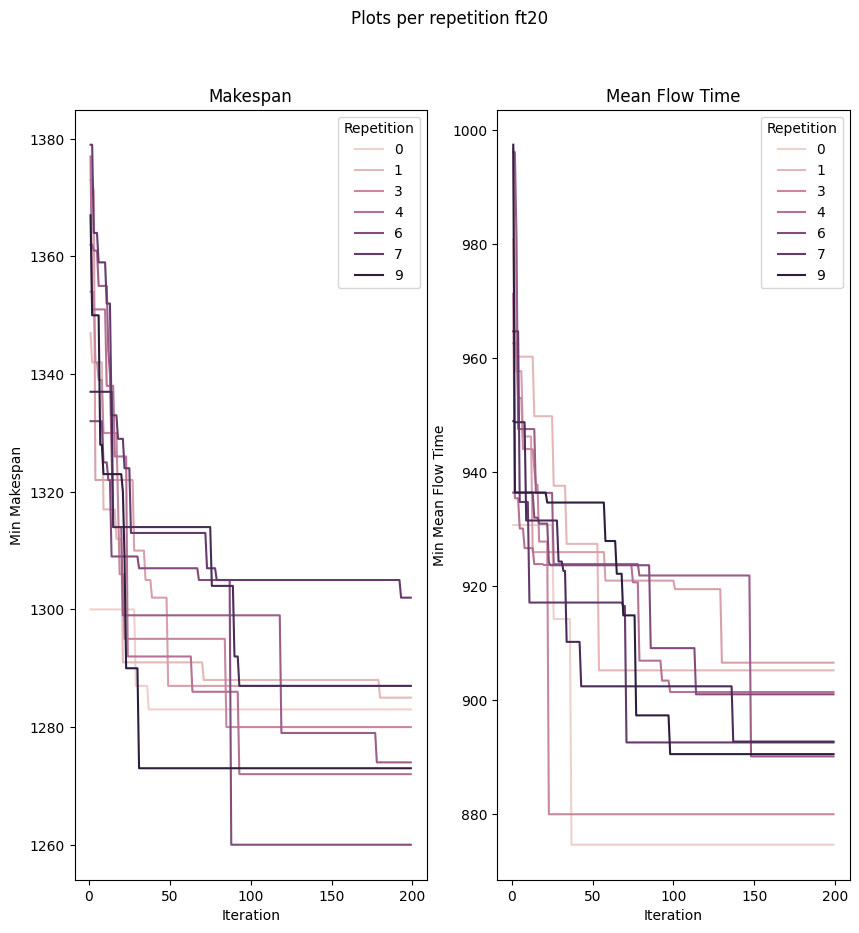

In [8]:
for problem in test_df["Problem"].unique():
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    plt.suptitle(f"Plots per repetition {str(problem)}")
    ax[0].set_title("Makespan")
    ax[1].set_title("Mean Flow Time")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Makespan", hue="Repetition", ax=ax[0])#, style="Candidate")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Mean Flow Time", hue="Repetition", ax=ax[1])
    plt.show()

Aggregate over repetitions to get average values and standard deviations for each metric at each iteration.

In [9]:
agg_columns = ["Time", "Min Makespan", "Max Makespan", "Avg Makespan", "Min Mean Flow Time", "Max Mean Flow Time", "Avg Mean Flow Time", "Spread", "N Fronts"]
agg_columns = list(test_df.columns[4:])
avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})
avg_df

C:\Users\b-mor\AppData\Local\Temp\ipykernel_23784\4239381174.py:3: FutureWarning: The provided callable <function std at 0x00000294D68B4940> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})


Time             \
                                                  mean        std   
Problem Candidate                 Iteration                         
ft06    quantum_position_encoding 1            0.05181   0.026512   
                                  2            0.67684   0.261027   
                                  3            1.23524   0.371215   
                                  4            1.77342   0.498641   
                                  5            2.31915   0.617425   
...                                                ...        ...   
ft20    quantum_position_encoding 195        525.57492  19.777499   
                                  196        528.20346  19.764291   
                                  197        530.88743  19.806215   
                                  198        533.62169  19.747981   
                                  199        536.31979  19.686041   

                                            Min Makespan             \
                                                    mean        std   
Problem Candidate                 Iteration                           
ft06    quantum_position_encoding 1                 58.3   0.823273   
                                  2                 58.1   0.737865   
                                  3                 57.8   0.632456   
                                  4                 57.7   0.483046   
                                  5                 57.7   0.483046   
...                                                  ...        ...   
ft20    quantum_position_encoding 195             1280.3  11.372970   
                                  196             1280.3  11.372970   
                                  197             1280.3  11.372970   
                                  198             1280.3  11.372970   
                                  199             1280.3  11.372970   

                                            Max Makespan             \
                                                    mean        std   
Problem Candidate                 Iteration                           
ft06    quantum_position_encoding 1                 66.0   7.023769   
                                  2                 64.0   5.792716   
                                  3                 63.8   5.750362   
                                  4                 62.1   6.045200   
                                  5                 62.0   6.110101   
...                                                  ...        ...   
ft20    quantum_position_encoding 195             1328.0  33.757304   
                                  196             1328.0  33.757304   
                                  197             1328.0  33.757304   
                                  198             1328.0  33.757304   
                                  199             1328.0  33.757304   

                                            Avg Makespan             \
                                                    mean        std   
Problem Candidate                 Iteration                           
ft06    quantum_position_encoding 1            61.590000   3.253604   
                                  2            60.775000   2.947601   
                                  3            60.283333   2.813438   
                                  4            59.534524   2.951103   
                                  5            59.368939   2.912596   
...                                                  ...        ...   
ft20    quantum_position_encoding 195        1301.747381  14.556518   
                                  196        1301.747381  14.556518   
                                  197        1301.433095  14.044169   
                                  198        1301.433095  14.044169   
                                  199        1301.433095  14.044169   

                                            Min Mean Flow Time             \
                     

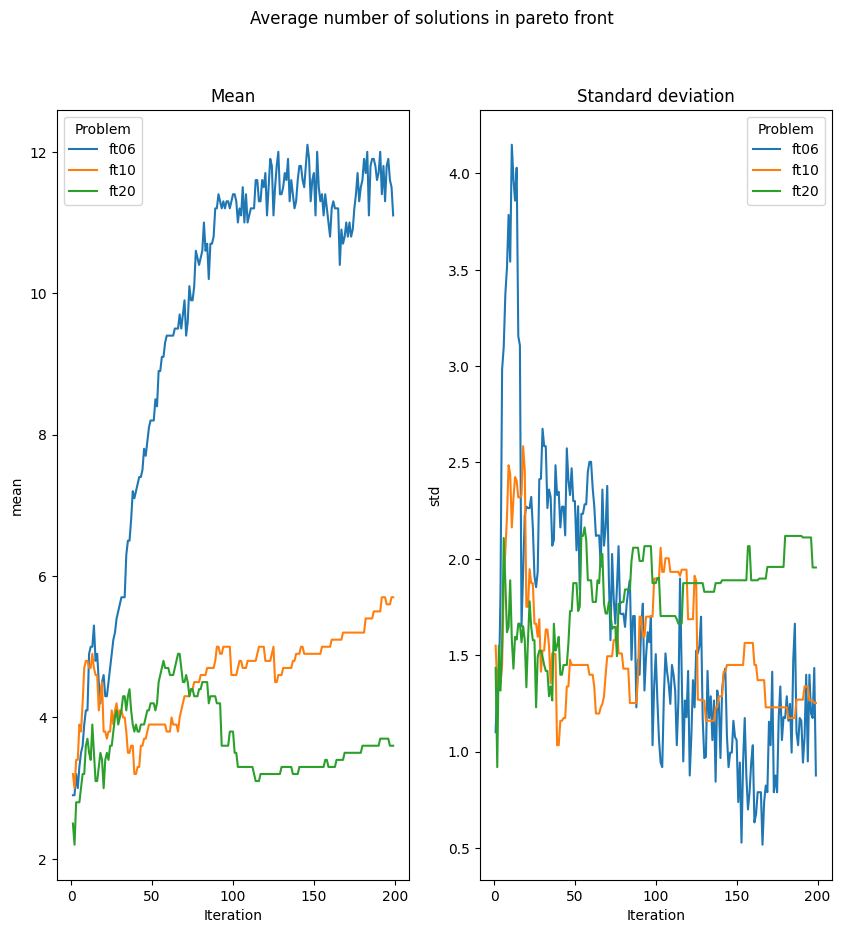

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average number of solutions in pareto front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Avg_n_solutions"))
plt.show()

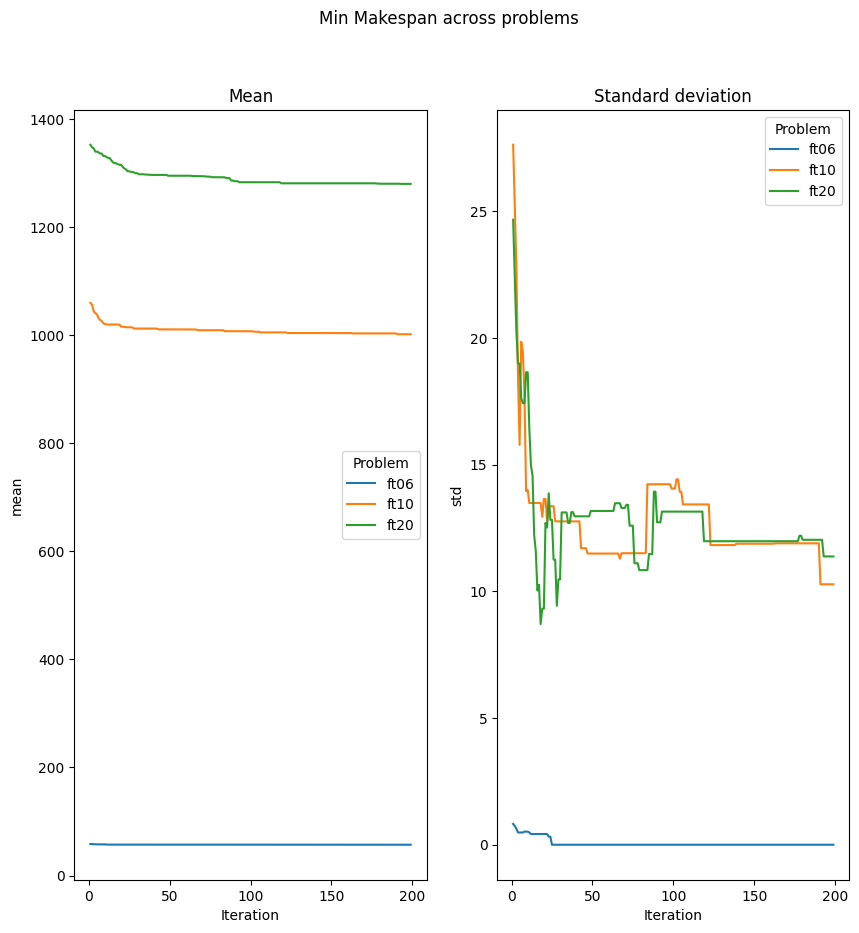

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan across problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Makespan"))
plt.show()
    

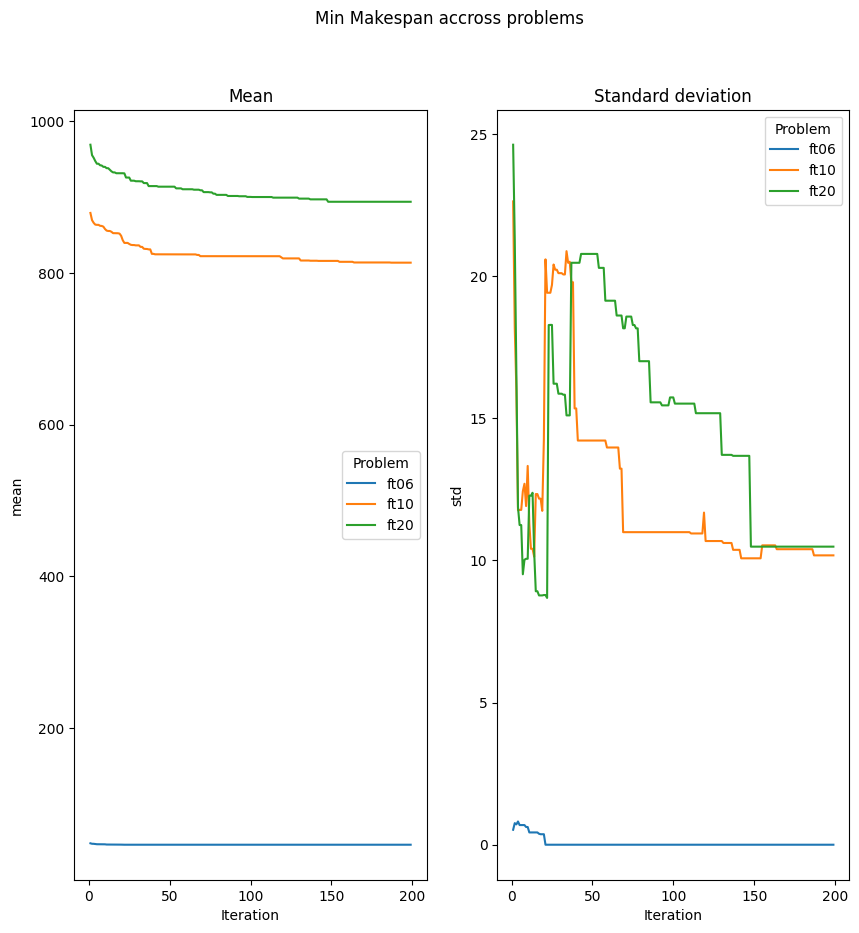

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan accross problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Mean_Flow_Time"))
plt.show()

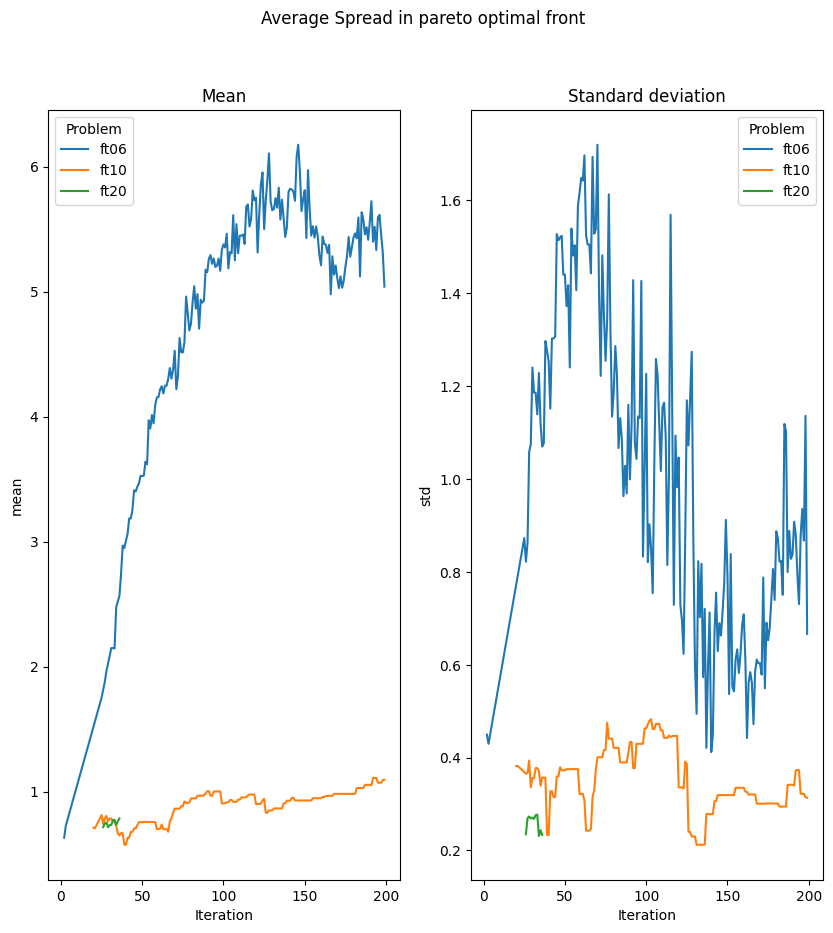

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average Spread in pareto optimal front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Spread"))
plt.show()

The average metrics for the final iterations

In [14]:
result_df = result_df.groupby(["Problem", "Candidate"]).agg({col_name : ["mean", "std"] for col_name in agg_columns})
result_df.to_csv(os.path.join(targ_dir, "result.csv"))

In [15]:
result_df

Time              Min Makespan  \
                                        mean          std         mean   
Problem Candidate                                                        
ft06    quantum_position_encoding  107.87676    16.982459         57.0   
ft10    quantum_position_encoding  666.25398  1052.128451       1002.0   
ft20    quantum_position_encoding  536.31979    19.686041       1280.3   

                                             Max Makespan             \
                                         std         mean        std   
Problem Candidate                                                      
ft06    quantum_position_encoding   0.000000         58.0   0.000000   
ft10    quantum_position_encoding  10.274023       1106.4  66.218829   
ft20    quantum_position_encoding  11.372970       1328.0  33.757304   

                                  Avg Makespan            Min Mean Flow Time  \
                                          mean        std               mean   
Problem Candidate                                                              
ft06    quantum_position_encoding    57.739837   0.093881          46.666667   
ft10    quantum_position_encoding  1043.992857  21.655806         813.300000   
ft20    quantum_position_encoding  1301.433095  14.044169         893.505000   

                                             Max Mean Flow Time             \
                                         std               mean        std   
Problem Candidate                                                            
ft06    quantum_position_encoding   0.000000               58.0   0.000000   
ft10    quantum_position_encoding  10.174696             1106.4  66.218829   
ft20    quantum_position_encoding  10.481451             1328.0  33.757304   

                                  Avg Mean Flow Time               Spread  \
                                                mean        std      mean   
Problem Candidate                                                           
ft06    quantum_position_encoding          47.403796   0.265996  5.039693   
ft10    quantum_position_encoding         848.153548  14.369948  1.094107   
ft20    quantum_position_encoding         914.839750  20.648962       inf   

                                            N Fronts            \
                                        std     mean       std   
Problem Candidate                                                
ft06    quantum_position_encoding  0.666294     11.0  1.333333   
ft10    quantum_position_encoding  0.313542     11.6  1.173788   
ft20    quantum_position_encoding       NaN     12.6  1.577621   

                                  N Non-dominated solutions            
                                                       mean       std  
Problem Candidate                                                      
ft06    quantum_position_encoding                      11.1  0.875595  
ft10    quantum_position_encoding                       5.7  1.251666  
ft20    quantum_position_encoding                       3.6  1.955050

In [16]:
test_df

,Problem,Candidate,Repetition,Iteration,Time,Min Makespan,Max Makespan,Avg Makespan,Min Mean Flow Time,Max Mean Flow Time,Avg Mean Flow Time,Spread,N Fronts,N Non-dominated solutions
0,ft06,quantum_position_encoding,0,1,0.0280,57.0,64.0,60.000000,48.500000,64.0,48.888889,0.573933,13,3
1,ft06,quantum_position_encoding,0,2,0.3937,57.0,58.0,57.500000,46.666667,58.0,48.083333,0.333333,14,2
2,ft06,quantum_position_encoding,0,3,0.8116,57.0,58.0,57.500000,46.666667,58.0,48.083333,0.333333,15,2
3,ft06,quantum_position_encoding,0,4,1.2157,57.0,58.0,57.666667,46.666667,58.0,47.611111,0.777778,13,3
4,ft06,quantum_position_encoding,0,5,1.5951,57.0,58.0,57.666667,46.666667,58.0,47.611111,0.777778,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,ft20,quantum_position_encoding,9,195,527.4754,1273.0,1382.0,1323.200000,890.550000,1382.0,922.210000,0.874428,12,5
5966,ft20,quantum_position_encoding,9,196,529.8741,1273.0,1382.0,1323.200000,890.550000,1382.0,922.210000,0.874428,13,5
5967,ft20,quantum_position_encoding,9,197,532.4934,1273.0,1382.0,1323.200000,890.550000,1382.0,922.210000,0.874428,13,5
5968,ft20,quantum_position_encoding,9,198,535.0341,1273.0,1382.0,1323.200000,890.550000,1382.0,922.210000,0.874428,11,5


Accessing the OR-library benchmarks

In [17]:
test_benchmark_collection = BenchmarkCollection(make_web_request=False)

In [18]:
cur_problem_names = test_df["Problem"].unique()
for p, v in test_benchmark_collection.benchmark_collection.items():
    if p in cur_problem_names:
        print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

ft06 6 x 6
ft10 10 x 10
ft20 20 x 5


In [19]:

for p, v in test_benchmark_collection.benchmark_collection.items():
    print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

abz5 10 x 10
abz6 10 x 10
abz7 20 x 15
abz8 20 x 15
abz9 20 x 15
ft06 6 x 6
ft10 10 x 10
ft20 20 x 5
la01 10 x 5
la02 10 x 5
la03 10 x 5
la04 10 x 5
la05 10 x 5
la06 15 x 5
la07 15 x 5
la08 15 x 5
la09 15 x 5
la10 15 x 5
la11 20 x 5
la12 20 x 5
la13 20 x 5
la14 20 x 5
la15 20 x 5
la16 10 x 10
la17 10 x 10
la18 10 x 10
la19 10 x 10
la20 10 x 10
la21 15 x 10
la22 15 x 10
la23 15 x 10
la24 15 x 10
la25 15 x 10
la26 20 x 10
la27 20 x 10
la28 20 x 10
la29 20 x 10
la30 20 x 10
la31 30 x 10
la32 30 x 10
la33 30 x 10
la34 30 x 10
la35 30 x 10
la36 15 x 15
la37 15 x 15
la38 15 x 15
la39 15 x 15
la40 15 x 15
orb01 10 x 10
orb02 10 x 10
orb03 10 x 10
orb04 10 x 10
orb05 10 x 10
orb06 10 x 10
orb07 10 x 10
orb08 10 x 10
orb09 10 x 10
orb10 10 x 10
swv01 20 x 10
swv02 20 x 10
swv03 20 x 10
swv04 20 x 10
swv05 20 x 10
swv06 20 x 15
swv07 20 x 15
swv08 20 x 15
swv09 20 x 15
swv10 20 x 15
swv11 50 x 10
swv12 50 x 10
swv13 50 x 10
swv14 50 x 10
swv15 50 x 10
swv16 50 x 10
swv17 50 x 10
swv18 50 x 10
sw

In [20]:
plt.cm.viridis(0.9)

(0.741388, 0.873449, 0.149561, 1.0)

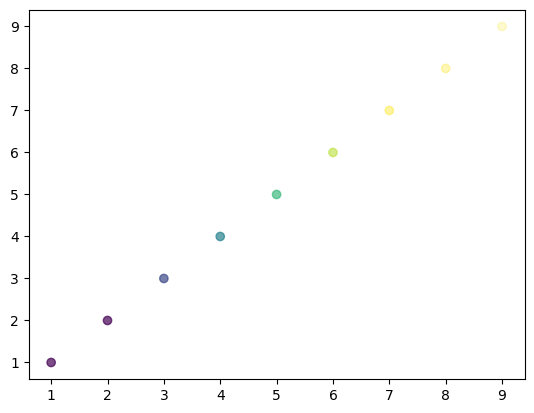

In [21]:
import matplotlib.pyplot as plt

test_x = [1,2,3,4,5,6,7,8,9]
test_y = [1,2,3,4,5,6,7,8,9]
colors = [plt.cm.viridis(((i-1)/len(test_x))*2) for i in range(len(test_x))]
for i in range(len(colors)):
    temp = list(colors[i])
    temp[-1] = np.min([1- (i-1)/(len(colors)), 0.7])
    colors[i] = temp
plt.scatter(test_x, test_y, c=colors)

In [22]:
with open("..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9", "rb") as pop_dump:
    pop_obj = pickle.load(pop_dump)

N = 50
for i, start in enumerate(pop_obj.front_start_index):
    print("New front: " + str(i))
    cur_front = pop_obj.get_front_range(i)

    end = cur_front[1]
    if end > N:
        # limit the end and length of front
        x_list = np.empty(cur_front[-1]-N)
        y_list = np.empty(cur_front[-1]-N)
        end = N
    else:
        x_list = np.empty(cur_front[-1])
        y_list = np.empty(cur_front[-1])

    for j, ind in enumerate(pop_obj.R[cur_front[0] : end]):
        x, y = ind.cur_fitness
        x_list[j] = x
        y_list[j] = y

    index_sort = x_list.argsort()
    index_sort = np.flip(index_sort)
    y_list = y_list[index_sort]
    x_list = x_list[index_sort]
    #y_list.sort()
    print(x_list, y_list)
    plt.plot(x_list, y_list)
    plt.scatter(x_list, y_list)

        
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9'